In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  

--2020-08-22 04:07:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  86.5MB/s    in 1.6s    

2020-08-22 04:07:45 (86.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-08-22 04:07:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

# Diretory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')


In [4]:
import tensorflow as tf

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), input_shape=(300, 300, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=100,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/100
8/8 [==============================] - 16s 2s/step - loss: 0.6919 - accuracy: 0.5195 - val_loss: 0.6697 - val_accuracy: 0.9258
Epoch 2/100
8/8 [==============================] - 18s 2s/step - loss: 0.6784 - accuracy: 0.6919 - val_loss: 0.6586 - val_accuracy: 0.5469
Epoch 3/100
8/8 [==============================] - 18s 2s/step - loss: 0.6662 - accuracy: 0.5595 - val_loss: 0.6205 - val_accuracy: 0.7773
Epoch 4/100
8/8 [==============================] - 19s 2s/step - loss: 0.6462 - accuracy: 0.6897 - val_loss: 0.5810 - val_accuracy: 0.9023
Epoch 5/100
8/8 [==============================] - 21s 3s/step - loss: 0.6159 - accuracy: 0.6973 - val_loss: 0.5374 - val_accuracy: 0.6992
Epoch 6/100
8/8 [==============================] - 21s 3s/step - loss: 0.5960 - accuracy: 0.7253 - val_loss: 0.5155 - val_accuracy: 0.7578
Epoch 7/100
8/8 [==============================] - 18s 2s/step - loss: 0.5657 - accuracy: 0.7608 - val_loss: 1.5561 - val_accuracy: 0.5000
Epoch 8/100
8/8 [==========

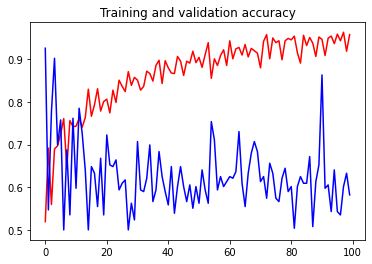

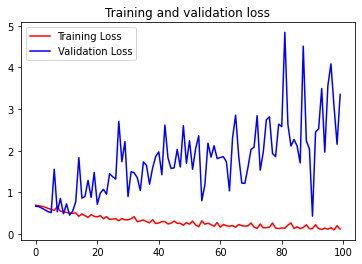

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()